# salvo_explore_pmw

Examine the data from the SSMIS passive microwave sensors at 37 GHz V-pol that have been cropped to the area around utqiagvik

In [1]:
import os

import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from modules.salvoimport import load_gml_albedo

%matplotlib inline

In [2]:
# Load data
ds_F16 = xr.load_dataset(os.path.join('..', 'data', 'pmw', 'NSIDC0630_SIR_EASE2_N3.125km_F16_SSMIS_37V_SALVO2024.nc'),
                        decode_cf=False)
ds_F18 = xr.load_dataset(os.path.join('..', 'data', 'pmw', 'NSIDC0630_SIR_EASE2_N3.125km_F18_SSMIS_37V_SALVO2024.nc'),
                        decode_cf=False)

# convert brightness temperatures into K
ds_F16['TB'] = ds_F16['TB']/100
ds_F18['TB'] = ds_F18['TB']/100

In [3]:
# Load gml weather data
# Load GML
dir_path = os.path.join("C:/", "Users", "dclemenssewall", "Desktop", "DavidCS", "NOAA", "projects", 
                        "SALVO", "data", "gml_albedo_rack")
df_gml = load_gml_albedo(dir_path)

df_gml['incident_bestestimate_W_m2'] = df_gml['direct_solar_W_m2']*np.cos(df_gml['zen']*np.pi/180) + df_gml['diffuse_solar_W_m2']
df_gml['incident_bestestimate_W_m2_qc'] = df_gml['direct_solar_W_m2_qc'] + df_gml['diffuse_solar_W_m2_qc']
df_gml['albedo'] = df_gml['reflected_solar_W_m2'] / df_gml['incident_bestestimate_W_m2']
df_gml['diffuse_frac'] = df_gml['diffuse_solar_W_m2']/df_gml['incident_bestestimate_W_m2']

In [4]:
# Convert zero valued brightness temperatures to NaN
ds_F16['TB'] = ds_F16['TB'].where(ds_F16.TB > 0, np.NaN)
ds_F18['TB'] = ds_F18['TB'].where(ds_F18.TB > 0, np.NaN)

In [5]:
# Create DAV
ds_F16['DAV'] = ds_F16['TB'].sel(ltod='e') - ds_F16['TB'].sel(ltod='m')
ds_F18['DAV'] = ds_F18['TB'].sel(ltod='e') - ds_F18['TB'].sel(ltod='m')

In [6]:
# Convert time coordinate
ds_F16 = ds_F16.assign_coords(time=pd.to_datetime(ds_F16.time.values, unit='D', origin=ds_F16.time.units[-19:]))
ds_F18 = ds_F18.assign_coords(time=pd.to_datetime(ds_F18.time.values, unit='D', origin=ds_F18.time.units[-19:]))

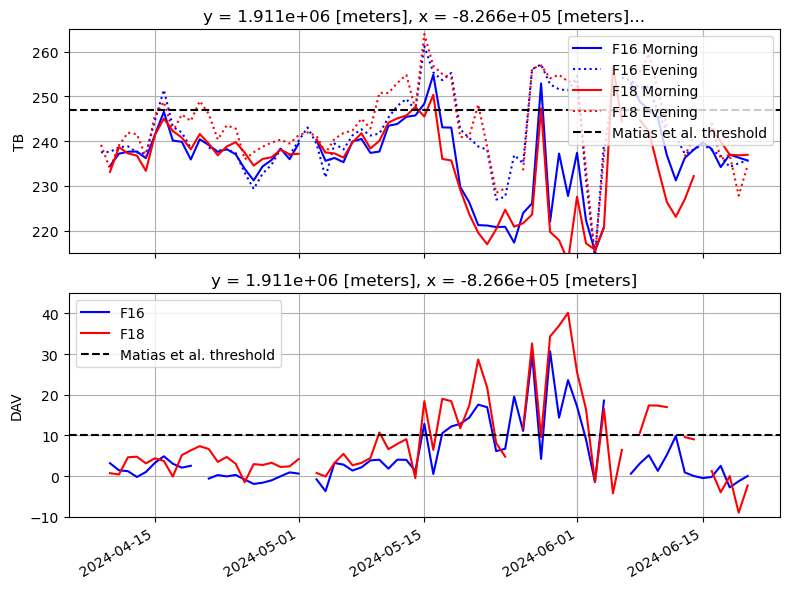

In [24]:
# Plot center point PMW

f, axs = plt.subplots(2, 1, sharex=True, figsize=(8,6), tight_layout=True)

# PLot TB
ds_F16.isel(x=10, y=10).sel(ltod='m').TB.plot(ax=axs[0], c='b', label='F16 Morning')
ds_F16.isel(x=10, y=10).sel(ltod='e').TB.plot(ax=axs[0], c='b', label='F16 Evening', ls=':')
ds_F18.isel(x=10, y=10).sel(ltod='m').TB.plot(ax=axs[0], c='r', label='F18 Morning')
ds_F18.isel(x=10, y=10).sel(ltod='e').TB.plot(ax=axs[0], c='r', label='F18 Evening', ls=':')

axs[0].axhline(y=247, c='k', ls='--', label='Matias et al. threshold')

axs[0].set_ylim([215, 265])
axs[0].legend()
axs[0].grid()
axs[0].set_xlabel('')

# Plot DAV
ds_F16.isel(x=10, y=10).DAV.plot(ax=axs[1], c='b', label='F16')
ds_F18.isel(x=10, y=10).DAV.plot(ax=axs[1], c='r', label='F18')

axs[1].axhline(y=10, c='k', ls='--', label='Matias et al. threshold')
axs[1].set_ylim([-10, 45])
axs[1].legend()
axs[1].grid()
axs[1].set_xlabel('')

f.savefig('../figures/pmw_center_point.png', bbox_inches='tight')

(19869.0, 19881.0)

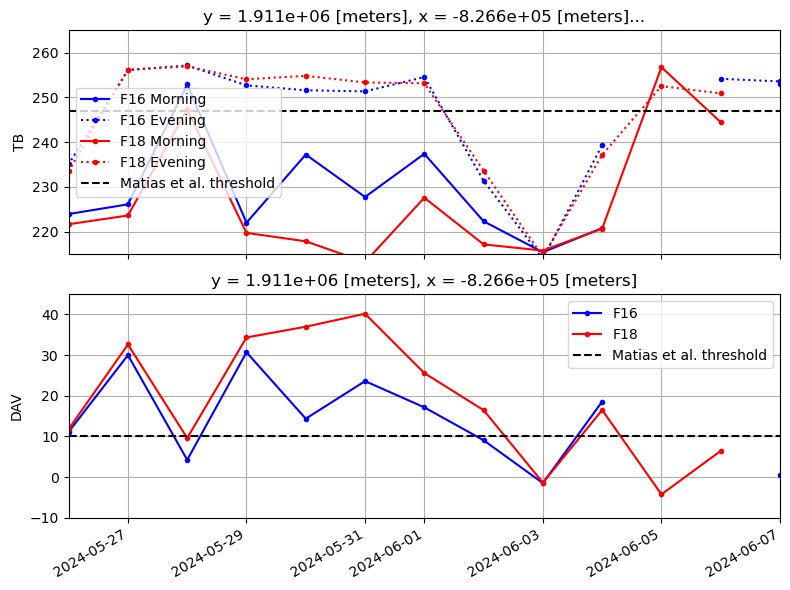

In [27]:
# Plot center point PMW

f, axs = plt.subplots(2, 1, sharex=True, figsize=(8,6), tight_layout=True)

# PLot TB
ds_F16.isel(x=10, y=10).sel(ltod='m').TB.plot(ax=axs[0], c='b', label='F16 Morning', marker='.')
ds_F16.isel(x=10, y=10).sel(ltod='e').TB.plot(ax=axs[0], c='b', label='F16 Evening', ls=':', marker='.')
ds_F18.isel(x=10, y=10).sel(ltod='m').TB.plot(ax=axs[0], c='r', label='F18 Morning', marker='.')
ds_F18.isel(x=10, y=10).sel(ltod='e').TB.plot(ax=axs[0], c='r', label='F18 Evening', ls=':', marker='.')

axs[0].axhline(y=247, c='k', ls='--', label='Matias et al. threshold')

axs[0].set_ylim([215, 265])
axs[0].legend()
axs[0].grid()
axs[0].set_xlabel('')

# Plot DAV
ds_F16.isel(x=10, y=10).DAV.plot(ax=axs[1], c='b', label='F16', marker='.')
ds_F18.isel(x=10, y=10).DAV.plot(ax=axs[1], c='r', label='F18', marker='.')

axs[1].axhline(y=10, c='k', ls='--', label='Matias et al. threshold')
axs[1].set_ylim([-10, 45])
axs[1].legend()
axs[1].grid()
axs[1].set_xlabel('')

lims = pd.to_datetime(['2024-05-26', '2024-06-07'])
axs[1].set_xlim(lims)

(19856.0, 19862.0)

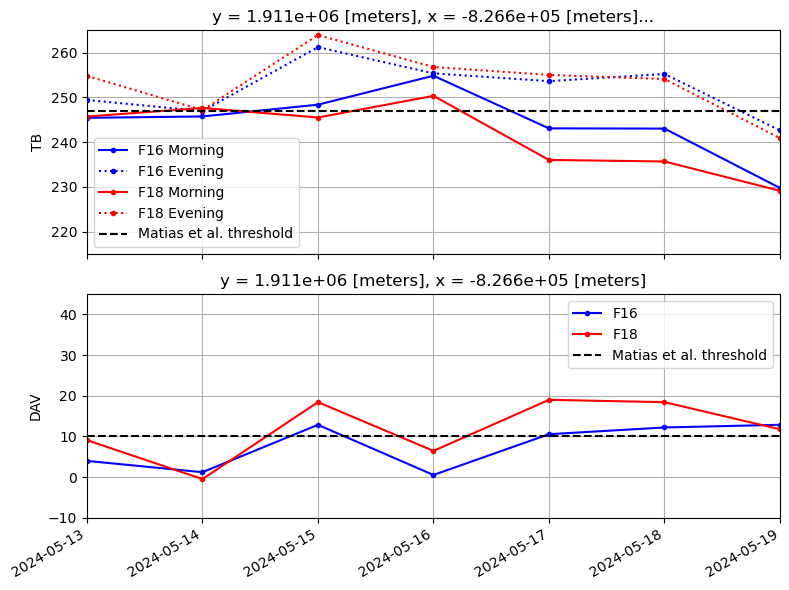

In [28]:
# Plot center point PMW

f, axs = plt.subplots(2, 1, sharex=True, figsize=(8,6), tight_layout=True)

# PLot TB
ds_F16.isel(x=10, y=10).sel(ltod='m').TB.plot(ax=axs[0], c='b', label='F16 Morning', marker='.')
ds_F16.isel(x=10, y=10).sel(ltod='e').TB.plot(ax=axs[0], c='b', label='F16 Evening', ls=':', marker='.')
ds_F18.isel(x=10, y=10).sel(ltod='m').TB.plot(ax=axs[0], c='r', label='F18 Morning', marker='.')
ds_F18.isel(x=10, y=10).sel(ltod='e').TB.plot(ax=axs[0], c='r', label='F18 Evening', ls=':', marker='.')

axs[0].axhline(y=247, c='k', ls='--', label='Matias et al. threshold')

axs[0].set_ylim([215, 265])
axs[0].legend()
axs[0].grid()
axs[0].set_xlabel('')

# Plot DAV
ds_F16.isel(x=10, y=10).DAV.plot(ax=axs[1], c='b', label='F16', marker='.')
ds_F18.isel(x=10, y=10).DAV.plot(ax=axs[1], c='r', label='F18', marker='.')

axs[1].axhline(y=10, c='k', ls='--', label='Matias et al. threshold')
axs[1].set_ylim([-10, 45])
axs[1].legend()
axs[1].grid()
axs[1].set_xlabel('')

lims = pd.to_datetime(['2024-05-13', '2024-05-19'])
axs[1].set_xlim(lims)

(220.0, 260.0)

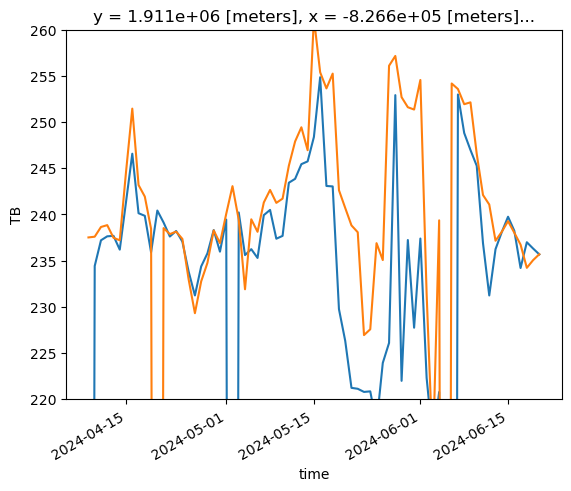

In [12]:
ds_F16.isel(x=10, y=10).sel(ltod='m').TB.plot()
ds_F16.isel(x=10, y=10).sel(ltod='e').TB.plot()
plt.ylim([220, 260])

In [10]:
# Fix time index
ds_F16

<xarray.Dataset>
Dimensions:          (time: 73, string1: 1, y: 20, x: 20)
Coordinates:
  * time             (time) float64 1.909e+04 1.909e+04 ... 1.916e+04 1.916e+04
  * y                (y) float64 1.942e+06 1.939e+06 ... 1.886e+06 1.883e+06
  * x                (x) float64 -8.578e+05 -8.547e+05 ... -8.016e+05 -7.984e+05
Dimensions without coordinates: string1
Data variables:
    crs              (time, string1, string1) |S1 b'' b'' b'' ... b'' b'' b''
    TB               (time, y, x) uint16 22233 22136 22067 ... 23153 23271 23466
    TB_num_samples   (time, y, x) uint8 33 36 39 39 36 37 ... 28 30 30 33 36 36
    Incidence_angle  (time, y, x) int16 5355 5356 5356 5356 ... 5353 5353 5353
    TB_std_dev       (time, y, x) uint16 68 72 73 74 75 ... 196 200 214 224 242
    TB_time          (time, y, x) int16 1527 1522 1534 1529 ... 1087 1083 1088

In [13]:
ds_F17.TB.min()

<xarray.DataArray 'TB' ()>
array(0, dtype=uint16)

(19828.0, 19831.0)

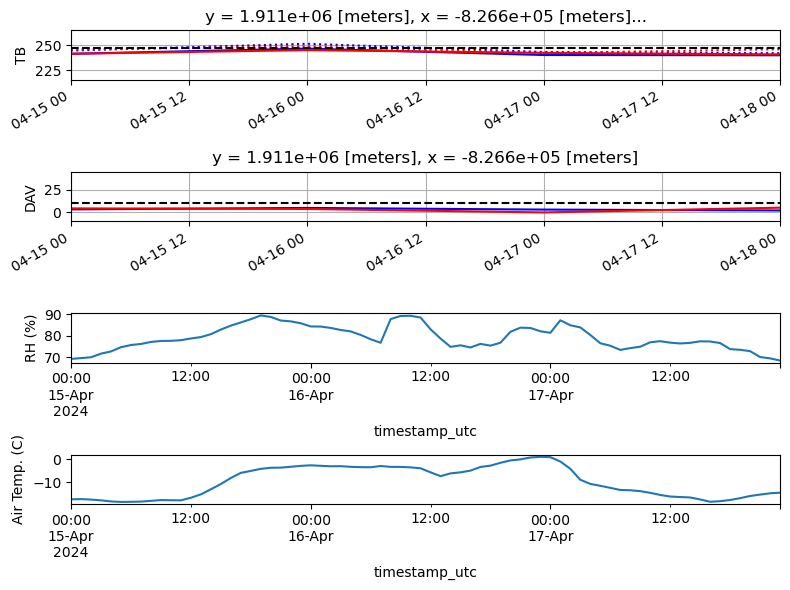

In [14]:
# Compare temperature and RH with PMW
# Plot center point PMW

f, axs = plt.subplots(4, 1, figsize=(8,6), tight_layout=True)

# PLot TB
ds_F16.isel(x=10, y=10).sel(ltod='m').TB.plot(ax=axs[0], c='b', label='F16 Morning')
ds_F16.isel(x=10, y=10).sel(ltod='e').TB.plot(ax=axs[0], c='b', label='F16 Evening', ls=':')
ds_F18.isel(x=10, y=10).sel(ltod='m').TB.plot(ax=axs[0], c='r', label='F18 Morning')
ds_F18.isel(x=10, y=10).sel(ltod='e').TB.plot(ax=axs[0], c='r', label='F18 Evening', ls=':')

axs[0].axhline(y=247, c='k', ls='--', label='Matias et al. threshold')

axs[0].set_ylim([215, 265])
#axs[0].legend()
axs[0].grid()
axs[0].set_xlabel('')

# Plot DAV
ds_F16.isel(x=10, y=10).DAV.plot(ax=axs[1], c='b', label='F16')
ds_F18.isel(x=10, y=10).DAV.plot(ax=axs[1], c='r', label='F18')

axs[1].axhline(y=10, c='k', ls='--', label='Matias et al. threshold')
axs[1].set_ylim([-10, 45])
#axs[1].legend()
axs[1].grid()
axs[1].set_xlabel('')

df_gml.resample('1h').mean().loc[slice('2024-04-15','2024-04-17')]['rh'].plot(ax=axs[2])
axs[2].set_ylabel('RH (%)')

df_gml.resample('1h').mean().loc[slice('2024-04-15','2024-04-17')]['air_temp_C'].plot(ax=axs[3])
axs[3].set_ylabel('Air Temp. (C)')


lims = pd.to_datetime(['2024-04-15', '2024-04-18'])

axs[0].set_xlim(lims)
axs[1].set_xlim(lims)